In [ ]:
#////////////////////////////////////////////////////////////////////////////////////
#CELL 0:   DATA PREPARATION
#////////////////////////////////////////////////////////////////////////////////////
#Prepare data from udacity large video data sets, I save images as jpeg  128x128 pixels , this requires 
#apropiate crop and resize for each image 


#first dataset 1.5 GB: Labels: Car, Truck, Pedestrian
#CSV Format:  xmin,  xmax, ymin,ymax, frame, label, preview url for frame

#second dataset 3.3 GB: Labels:  Car, Truck, Pedestrian, Street Lights
#CSV Format: frame, xmin, ymin,xmax, ymax, occluded, label, attributes (Only appears on traffic lights)

import matplotlib.pyplot as plt
import cv2
import csv
#import data from udacity data set 
samples = []
dataset=2
imgpath=""
images = []
labels = []
counter=0


if dataset==1:   
    imgpath="/media/john/Data/VehicleDetectionDataSets/object-detection-crowdai/"   
    with open('/media/john/Data/VehicleDetectionDataSets/object-detection-crowdai/labels.csv') as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            samples.append(line)
if dataset==2:            
    imgpath="/media/john/Data/VehicleDetectionDataSets/object-dataset/"   
    with open('/media/john/Data/VehicleDetectionDataSets/object-dataset/labels.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ')
        for line in reader:
            samples.append(line)
            
            

import scipy.misc
cardatacounter=1
truckdatacounter=1
pedestriandatacounter=1
streetlightsreddatacounter=1
streetlightsredleftdatacounter=1
streetlightsgreendatacounter=1
streetlightsgreenleftdatacounter=1
streetlightsyellowdatacounter=1
streetlightsyellowleftdatacounter=1

if dataset==1:
    for x in range(0,72064):#72064
        imagename = imgpath+samples[x][4]
        image = cv2.imread(imagename)
        w=int(samples[x][2])-int(samples[x][0])
        h=int(samples[x][3])-int(samples[x][1])
        crop_img = image[int(samples[x][1]):int(samples[x][1])+h, int(samples[x][0]):int(samples[x][0])+w] # Crop [y: y + h, x: x + w]
        cis=crop_img.shape
        if cis[0]>0 and cis[1]>0:
            resized_image = cv2.resize(crop_img,(128,128), interpolation = cv2.INTER_AREA)
            images.append(resized_image)
            labels.append(samples[x][5])
            #plt.figure(figsize=(1,1))
            #plt.imshow(resized_image)
            if samples[x][5]=="Car":   
                scipy.misc.imsave('/media/john/Data/VehicleDetectionDataSets/udacitydata/udacars1/'+str(cardatacounter)+'.jpg', resized_image)
                cardatacounter+=1
            elif  samples[x][5]=="Truck":  
                scipy.misc.imsave('/media/john/Data/VehicleDetectionDataSets/udacitydata/udatrucks1/'+str(truckdatacounter)+'.jpg', resized_image)
                truckdatacounter+=1
            elif  samples[x][5]=="Pedestrian":  
                scipy.misc.imsave('/media/john/Data/VehicleDetectionDataSets/udacitydata/udapedestrian1/'+str(pedestriandatacounter)+'.jpg', resized_image)  
                pedestriandatacounter+=1
            elif  samples[x][5]=="trafficLight":  
                scipy.misc.imsave('/media/john/Data/VehicleDetectionDataSets/udacitydata/streetlights1/'+str(streetlightsdatacounter)+'.jpg', resized_image)  
                streetlightsdatacounter+=1    
                         
elif dataset==2:
    for x in range(0, 93085): #93085   
        imagename = imgpath+samples[x][0]
        image = cv2.imread(imagename)
        w=int(samples[x][3])-int(samples[x][1])
        h=int(samples[x][4])-int(samples[x][2])
        crop_img = image[int(samples[x][2]):int(samples[x][2])+h, int(samples[x][1]):int(samples[x][1])+w] # Crop [y: y + h, x: x + w]
        cis=crop_img.shape
        if cis[0]>0 and cis[1]>0:
            resized_image = cv2.resize(crop_img,(128,128), interpolation = cv2.INTER_AREA)
            images.append(resized_image)
            labels.append(samples[x][6])
            #plt.figure(figsize=(1,1))
            #plt.imshow(resized_image)
            if samples[x][6]=="car":   
                scipy.misc.imsave('/media/john/Data/VehicleDetectionDataSets/udacitydata/udacars2/'+str(cardatacounter)+'.jpg', resized_image)
                cardatacounter+=1
            elif  samples[x][6]=="truck":  
                scipy.misc.imsave('/media/john/Data/VehicleDetectionDataSets/udacitydata/udatrucks2/'+str(truckdatacounter)+'.jpg', resized_image)
                truckdatacounter+=1
            elif  samples[x][6]=="pedestrian":  
                scipy.misc.imsave('/media/john/Data/VehicleDetectionDataSets/udacitydata/udapedestrian2/'+str(pedestriandatacounter)+'.jpg', resized_image)  
                pedestriandatacounter+=1
            elif  samples[x][6]=="trafficLight" and len(samples[x])>7: 
                if samples[x][7]=="Red":
                    scipy.misc.imsave('/media/john/Data/VehicleDetectionDataSets/udacitydata/udastreetlights2/Red/'+str(streetlightsreddatacounter)+'.jpg', resized_image)  
                    streetlightsreddatacounter+=1   
                if samples[x][7]=="RedLeft":
                    scipy.misc.imsave('/media/john/Data/VehicleDetectionDataSets/udacitydata/udastreetlights2/RedLeft/'+str(streetlightsredleftdatacounter)+'.jpg', resized_image)  
                    streetlightsredleftdatacounter+=1                
                if samples[x][7]=="Green":
                    scipy.misc.imsave('/media/john/Data/VehicleDetectionDataSets/udacitydata/udastreetlights2/Green/'+str(streetlightsgreendatacounter)+'.jpg', resized_image)  
                    streetlightsgreendatacounter+=1
                if samples[x][7]=="GreenLeft":
                    scipy.misc.imsave('/media/john/Data/VehicleDetectionDataSets/udacitydata/udastreetlights2/GreenLeft/'+str(streetlightsgreenleftdatacounter)+'.jpg', resized_image)  
                    streetlightsgreenleftdatacounter+=1                    
                if samples[x][7]=="Yellow":
                    scipy.misc.imsave('/media/john/Data/VehicleDetectionDataSets/udacitydata/udastreetlights2/Yellow/'+str(streetlightsyellowdatacounter)+'.jpg', resized_image)  
                    streetlightsyellowdatacounter+=1   
                if samples[x][7]=="YellowLeft":
                    scipy.misc.imsave('/media/john/Data/VehicleDetectionDataSets/udacitydata/udastreetlights2/YellowLeft/'+str(streetlightsyellowleftdatacounter)+'.jpg', resized_image)  
                    streetlightsyellowleftdatacounter+=1                                

In [ ]:
#////////////////////////////////////////////////////////////////////////////////////
#CELL 1:   TRAIN SVM MODEL
#////////////////////////////////////////////////////////////////////////////////////
#Read the data of car and non car images (jpeg type), split data in train and test sets with apropiate shuffle and extract
#features vectors from color , spatial and hog descriptors, then a normalization of feature vectors is applied
#finally train a svm as a binary classification method with linear kernel and save  parameters and result model 

from functions import *

#Paths to car and non car images folders
carimagespath    = glob.glob('/media/john/Data/VehicleDetectionDataSets/vehicles/*/*/*/*.jpeg')
notcarimagespath = glob.glob('/media/john/Data/VehicleDetectionDataSets/nonvehicles/*/*/*/*.jpeg')
#initialize data array
cars = []
notcars = [] 
#load train - validation data 
for image in carimagespath:
    cars.append(image)
for image in notcarimagespath:
    notcars.append(image)
    
data_info = data_look(cars, notcars)

print('Your function returned a count of', data_info["n_cars"], ' cars and', data_info["n_notcars"], ' non-cars')
print('of size: ',data_info["image_shape"], ' and data type:', data_info["data_type"]) 


# Define same range of data  for two classes:
sample_size = 9988 # this number results from car-non car data sets provided for Udacity team
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

option=0

#I play with two parameter options for feature extraction phase:

if option ==0:
    
    color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
    orient = 12  # HOG orientations
    pix_per_cell = 4 # HOG pixels per cell
    cell_per_block = 2 # HOG cells per block
    hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
    spatial_size = (32, 32) # Spatial binning dimensions
    hist_bins = 128   # Number of histogram bins
    spatial_feat = True # Spatial features on or off
    hist_feat = True # Histogram features on or off
    hog_feat = True # HOG features on or off


else :

    color_space = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
    orient = 12  # HOG orientations
    pix_per_cell = 8 # HOG pixels per cell
    cell_per_block = 2 # HOG cells per block
    hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
    spatial_size = (32, 32) # Spatial binning dimensions
    hist_bins = 128    # Number of histogram bins
    spatial_feat = True # Spatial features on or off
    hist_feat = True # Histogram features on or off
    hog_feat = True # HOG features on or off




#Extract features
car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

X = np.vstack((car_features, notcar_features)).astype(np.float64)  

# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=rand_state)

print('Using:',orient,'orientations',pix_per_cell,'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))

# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

# Check the prediction time for a single sample
t=time.time()

#Save train params and SVM model 
dist_pickle = {}
dist_pickle["svc"] = svc
dist_pickle["scaler"] = X_scaler
dist_pickle["orient"] = orient
dist_pickle["pix_per_cell"] = pix_per_cell
dist_pickle["cell_per_block"] = cell_per_block
dist_pickle["spatial_size"] = spatial_size
dist_pickle["hist_bins"] = hist_bins
dist_pickle["color_space"] = color_space
dist_pickle["hog_channel"]=hog_channel
dist_pickle["spatial_feat"]=True
dist_pickle["hist_feat"]=True
dist_pickle["hog_feat"]=True

if option ==0:
    pickle.dump( dist_pickle, open( "svm_train_params1.p", "wb" ) )
else:    
    pickle.dump( dist_pickle, open( "svm_train_params2.p", "wb" ) )
    
print("svm saved")

Your function returned a count of 9988  cars and 10093  non-cars
of size:  (64, 64, 3)  and data type: uint8
Using: 12 orientations 4 pixels per cell and 2 cells per block
Feature vector length: 35856


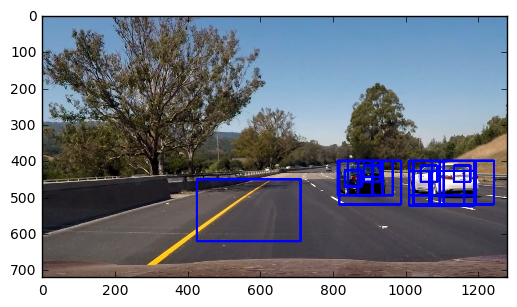

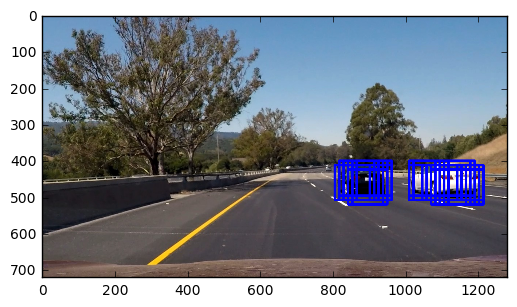

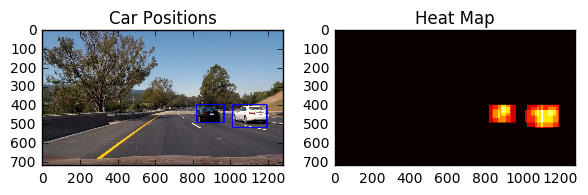

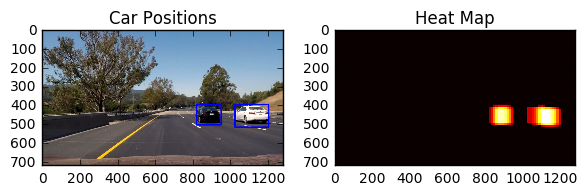

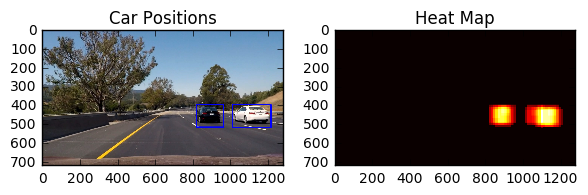

In [20]:
#////////////////////////////////////////////////////////////////////////////////////
#CELL 2:   INDIVIDUAL IMAGES 
#////////////////////////////////////////////////////////////////////////////////////

#Load functions from vehicle detection Udacity lessons 
from functions import *

#Load SVM train parameters and model (I can select from svm_train_params1.p  and svm_train_params2.p )
dist_pickle = pickle.load( open("svm_train_params2.p", "rb" ) )
readsvc = dist_pickle["svc"]
readX_scaler = dist_pickle["scaler"]
readorient = dist_pickle["orient"]
readpixpercell = dist_pickle["pix_per_cell"]
readcellperblock = dist_pickle["cell_per_block"]
readspatialsize = dist_pickle["spatial_size"]
readhistbins = dist_pickle["hist_bins"]
readcolorspace = dist_pickle["color_space"]
readhogchannel = dist_pickle["hog_channel"]
readspatialfeat = dist_pickle["spatial_feat"]
readhistfeat = dist_pickle["hist_feat"]
readhogfeat = dist_pickle["hog_feat"]

# Read individual frames from test images folder or video project frames
image = mpimg.imread('../test_images/test6.jpg')
#image = mpimg.imread('../project_video_frames/image-050.jpg')


draw_image = np.copy(image)
draw_imagebbox = np.copy(image)
# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#simage = image.astype(np.float32)/255


#Sliding Window Search Algorithm Params     
xywindowsize =[(285,170),(170,120),(95,95),(45,45)] #Size of search window
ystartstop = [400, 670] #[400, 656] [400, 720] Min and max in y to search in slide_window()
xyoverlap=(0.7,0.7)#Overlap percent
rectangleswbuff=[]

for sizes in xywindowsize:
    windows = slide_window(simage,x_start_stop=[None, None],y_start_stop=ystartstop,xy_window=sizes,xy_overlap=xyoverlap)
    #Color and spatial binning features extraction 
    hot_windows = search_windows(image, windows, readsvc, readX_scaler, color_space=readcolorspace, 
                                 spatial_size=readspatialsize, hist_bins=readhistbins, 
                                 orient=readorient, pix_per_cell=readpixpercell, 
                                 cell_per_block=readcellperblock, 
                                 hog_channel=readhogchannel, spatial_feat=readspatialfeat, 
                                 hist_feat=readhistfeat, hog_feat=readhogfeat)  
    for hot_window in hot_windows:
        rectangleswbuff.append(hot_window)

window_img,rectanglesw = draw_boxes(draw_image,rectangleswbuff, color=(0, 0, 255), thick=6)                        
plt.imshow(window_img)
plt.show()

scale =1.5# Scale Hog param

#Hog features extraction
out_img,rectanglesh = find_cars(image,ystartstop[0],ystartstop[1], scale, readsvc, readX_scaler, readorient, readpixpercell, readcellperblock, readspatialsize, readhistbins)
plt.imshow(out_img)
plt.show()

# False positives reduction by heat map technique 

thr=2 #Heat map treshold param

#Heat map from color and spatial features  resulting boxes
heatmapw=get_heat2(simage,rectanglesw,1)
labelsw = label(heatmapw)
draw_imgw,boxes = draw_labeled_bboxes(np.copy(image), labelsw)

#Heat map from hog features  resulting boxes
heatmaph=get_heat2(image,rectanglesh,thr)
labelsh = label(heatmaph)
draw_imgh,boxes = draw_labeled_bboxes(np.copy(image), labelsh)


#Heat map from color, spatial and hog features resulting boxes 
if  rectanglesw and rectanglesh:
    bbox=np.vstack((rectanglesw,rectanglesh))
    heatmap=get_heat2(image,bbox,thr)
    labelsbbox = label(heatmap)
    draw_imgbbox,boxes = draw_labeled_bboxes(np.copy(image), labelsbbox)


#Draw results:
#For color and spatial
fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_imgw)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmapw, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()
plt.show()
#For Hog
fig2 = plt.figure()
plt.subplot(121)
plt.imshow(draw_imgh)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmaph, cmap='hot')
plt.title('Heat Map')
fig2.tight_layout()
plt.show()
#For color, spatial and Hog
fig3 = plt.figure()
plt.subplot(121)
plt.imshow(draw_imgbbox )
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig3.tight_layout()
plt.show()

In [1]:
#////////////////////////////////////////////////////////////////////////////////////
#CELL 3:   VIDEO PIPELINE
#////////////////////////////////////////////////////////////////////////////////////


from functions import * #load vehicle detection functions
from lanefunctions import *# load lane lines advanced detection functions

#load svm model and parameters:
dist_pickle = pickle.load( open("svm_train_params3.p", "rb" ) )
readsvc = dist_pickle["svc"]
readX_scaler = dist_pickle["scaler"]
readorient = dist_pickle["orient"]
readpixpercell = dist_pickle["pix_per_cell"]
readcellperblock = dist_pickle["cell_per_block"]
readspatialsize = dist_pickle["spatial_size"]
readhistbins = dist_pickle["hist_bins"]
readcolorspace = dist_pickle["color_space"]
readhogchannel = dist_pickle["hog_channel"]
readspatialfeat = dist_pickle["spatial_feat"]
readhistfeat = dist_pickle["hist_feat"]
readhogfeat = dist_pickle["hog_feat"]

# adjust color and spatial feature params:
xywindowsize =[(285,170),(170,120),(95,95),(45,45)] #Size of search window
ystartstop = [400, 670] #Min and max in y to search in slide_window()
xyoverlap=(0.5,0.5)#Overlap percent

# adjust hog features params: 
scale =1.5#Hog scale params

# false positives buffer filter
framerange=15#frame buffer lenght
boxcontainer= collections.deque(maxlen=framerange)

def pipeline (image):
    draw_image = np.copy(image)
    draw_imagebbox = np.copy(image)
    # Uncomment the following line if you extracted training
    # data from .png images (scaled 0 to 1 by mpimg) and the
    # image you are searching is a .jpg (scaled 0 to 255)
    #simage = image.astype(np.float32)/255

    #Sliding Window Search Algorithm Params
    rectangleswbuff=[]
    for sizes in xywindowsize:
        windows = slide_window(image,x_start_stop=[None, None],y_start_stop=ystartstop,xy_window=sizes,xy_overlap=xyoverlap)
        hot_windows = search_windows(simage, windows, readsvc, readX_scaler, color_space=readcolorspace, 
                            spatial_size=readspatialsize, hist_bins=readhistbins, 
                            orient=readorient, pix_per_cell=readpixpercell, 
                            cell_per_block=readcellperblock, 
                            hog_channel=readhogchannel, spatial_feat=readspatialfeat, 
                            hist_feat=readhistfeat, hog_feat=readhogfeat) 
        for hot_window in hot_windows:
            rectangleswbuff.append(hot_window)
        
    window_img,rectanglesw = draw_boxes(draw_image,rectangleswbuff, color=(0, 0, 255), thick=6)                       
    out_img,rectanglesh = find_cars(image,ystartstop[0],ystartstop[1], scale, readsvc, readX_scaler, readorient, readpixpercell, readcellperblock, readspatialsize, readhistbins)
    #Apply Heat map filter for individual frames with color, spatial and HOG features resulting boxes
    if  rectanglesw and rectanglesh:
        bbox=np.vstack((rectanglesw,rectanglesh))
        heatmap=get_heat2(image,bbox,3)
        labelsbbox = label(heatmap)
        draw_imgbbox,boxes = draw_labeled_bboxes(np.copy(image), labelsbbox) 
        for b in boxes:
            boxcontainer.append(b)
    #Apply Heat map filter for temporal FIFO buffer 
    timeheatmap=get_heat2(simage,boxcontainer,5)
    timelabels = label(timeheatmap)
    out,b = draw_labeled_bboxes(np.copy(image), timelabels)
    outcent=np.copy(image)
    #Draw centroids of final car bounding boxes 
    centroids=computecentroids(b)
    for centroid in centroids:
        xy1=(centroid[0]-10 , centroid[1]-10)
        xy2=(centroid[0]+10 , centroid[1]+10)
        outcent=cv2.circle(out, (centroid[0],centroid[1]), 10,(255,255,0), thickness=10, lineType=8, shift=0)
    #Apply advanced lane line algorithms  
    withlane=lanepipeline(outcent)
    #Return source image with car and lane line detection  
    return withlane
 
    
#/////////////////////////////////////////////////////////////////////////////////////
#PROCESS THE PROJECT VIDEO 
#/////////////////////////////////////////////////////////////////////////////////////

challenge_output = 'video_result_with_lane.mp4'
#clip1 = VideoFileClip("test_video.mp4")
clip1 = VideoFileClip("../project_video.mp4")
project_clip = clip1.fl_image(pipeline)
%time project_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video uu.mp4
[MoviePy] Writing video uu.mp4


100%|█████████▉| 1260/1261 [1:14:15<00:03,  3.21s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: uu.mp4 

CPU times: user 5h 24min 23s, sys: 6min 57s, total: 5h 31min 20s
Wall time: 1h 14min 16s
